# What Factors Influence Home Price 

In [1]:
#Importing Packages
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution 
# This is excluding NaN values.
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Beginnign the clean up of the dataframe
data = data.reset_index()
columns = data.columns.to_list()
columns

['index',
 'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
data.columns = data.columns.str.replace(' ', '')

In [6]:
# Dropping useless series from the dataframe
data = data.drop(columns=['index', 'id'])

In [7]:
# Placing the Dependent Variable on the far left of the dataframe
cols = list(data.columns)
cols = [cols[1]] + cols[:1] + cols[2:]
data = data[cols]

In [8]:
# Checking Missing Data by Percentage 
data.isna().mean().round(4) * 100

price             0.00
date              0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64

In [9]:
# Checking dtypes against the initial info and describe information provided
display(data.shape)
data.dtypes

(21597, 20)

price            float64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Need to check on possibly modification of data types for the following columns:

1.) sqft_basement

2.) date

In [10]:
errors = []
for idx in data.index:
    try: 
        float(data.sqft_basement[idx])
    except:
        errors.append(idx)

In [11]:
data.iloc[errors].sqft_basement.value_counts()

?    454
Name: sqft_basement, dtype: int64

#### I can replace nan's or missing data with the mean, for the following columns: price, sqft_living, sqft_lot, sqft_above, sqft_living15 and sqft_lot 15

In [12]:
data['sqft_basement'] = pd.to_numeric(data.sqft_basement, errors="coerce")
data['yr_renovated'] = pd.to_numeric(data.yr_renovated, errors="coerce")

In [13]:
column_means = data.mean()
data = data.fillna(column_means)

In [14]:
data['price'] = data['price'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)
data['waterfront'] = data['waterfront'].astype(int)
data['view'] = data['view'].astype(int)

In [15]:
data['sqft_basement'] = data['sqft_basement'].astype(int)
data['yr_renovated'] = data['yr_renovated'].astype(int)
data['lat'] = data['lat'].astype(int)
data['long'] = data['long'].astype(int)

In [16]:
data.dtypes

price             int64
date             object
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
grade             int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
zipcode           int64
lat               int64
long              int64
sqft_living15     int64
sqft_lot15        int64
dtype: object

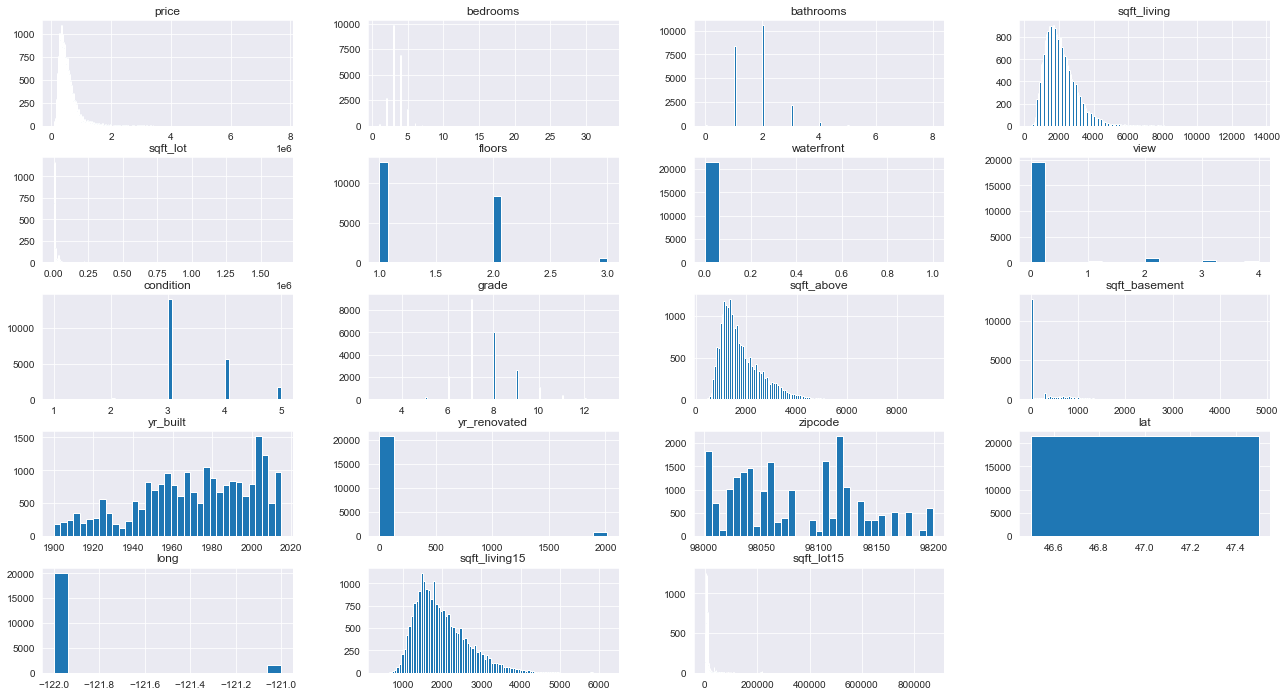

In [17]:
data.hist(figsize  = [22, 12], bins = 'auto');

In [18]:
data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,10/13/2014,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47,-122,1340,5650
1,538000,12/9/2014,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47,-122,1690,7639
2,180000,2/25/2015,2,1,770,10000,1,0,0,3,6,770,0,1933,83,98028,47,-122,2720,8062
3,604000,12/9/2014,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47,-122,1360,5000
4,510000,2/18/2015,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47,-122,1800,7503


# Feature Engineering

In [19]:
data['age'] = 2021 - data.yr_built
data = data.drop(columns=['yr_built'], axis=1)

In [20]:
#Convert date column to 2 separate columns for month and year
date = data['date'].str.split('/', expand=True)
data['month_sold'] = date[0].astype('int64')
data['year_sold'] = date[2].astype('int64')
#Drop original date column
data.drop(columns=['date'], axis=1, inplace=True)

In [21]:
# Let's change yr_renovated to a binary column? Since it's not manadatory to have renovated your home

data.yr_renovated.fillna(0.0, inplace=True)
#Create renovated column
data['renovated'] = data.year_sold - data.yr_renovated
#Replace any values less than 10 with 1, and any values over 10 with 0renovated = df.renovated.values
age = data.age.values
values = np.where(data.renovated <= 10, 1, 0)
data['renovated'] = np.where(age <= 5, 1, values)
#Drop yr_renovated column
data.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [22]:
# sqft_livingsquare  -  footage of the home
# sqft_lotsquare-  footage of the lot

# sqft_above - square footage of house apart from basement
# sqft_basement - square footage of the basement

# sqft_above + sqft_basement = sqft_livingsquare
data['yard_space'] = data.sqft_lot - data.sqft_living

# Final Model 

#### Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. 
#### When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively

#### Scaling is required to rescale the data and it’s used when we want features to be compared on the same scale for our algorithm. And, when all features are in the same scale, it also helps algorithms to understand the relative relationship better.


In [23]:
def scale_column(x):
    return (x-x.mean())/x.std()

In [24]:
data['price_log'] = np.log(data['price'])
data['sqft_living_log'] = np.log(data['sqft_living'])
data['sqft_lot15_log'] = np.log(data['sqft_lot15'])
data['sqft_living15_log'] = np.log(data['sqft_living15'])

In [25]:
data['bedrooms_scaled'] = scale_column(data.bedrooms)
data['bathrooms_scaled'] = scale_column(data.bathrooms)
data['floors_scaled'] = scale_column(data.floors)
data['waterfront_scaled'] = scale_column(data.waterfront)
data['view_scaled'] = scale_column(data.view)
data['condition_scaled'] = scale_column(data.condition)
data['grade_scaled'] = scale_column(data.grade)
data['age_scaled'] = scale_column(data.age)
data['year_sold_scaled'] = scale_column(data.year_sold)
data['renovated_scaled'] = scale_column(data.renovated)
data['month_sold_scaled'] = scale_column(data.month_sold)

In [26]:
model1_cols =  ['price_log',
                'sqft_living_log',
                'sqft_lot15_log',
                'sqft_living15_log',
                'bedrooms_scaled',
                'bathrooms_scaled',
                'floors_scaled',
                'waterfront_scaled',
                'view_scaled',
                'condition_scaled',
                'grade_scaled',
                'age_scaled',
                'year_sold_scaled',
                'renovated_scaled',
                'month_sold_scaled']
model1 = data[model1_cols]

In [27]:
display(model1.shape)
model1.head()

(21597, 15)

,price_log,sqft_living_log,sqft_lot15_log,sqft_living15_log,bedrooms_scaled,bathrooms_scaled,floors_scaled,waterfront_scaled,view_scaled,condition_scaled,grade_scaled,age_scaled,year_sold_scaled,renovated_scaled,month_sold_scaled
0,12.309982,7.073270,8.639411,7.200425,-0.402894,-1.022639,-0.808449,-0.082498,-0.304942,-0.629972,-0.560787,0.544665,-0.690651,-0.115226,1.099828
1,13.195614,7.851661,8.941022,7.432484,-0.402894,0.339681,1.004267,-0.082498,-0.304942,-0.629972,-0.560787,0.680835,-0.690651,-0.115226,1.741870
2,12.100712,6.646391,8.994917,7.908387,-1.482459,-1.022639,-0.808449,-0.082498,-0.304942,-0.629972,-1.413157,1.293596,1.447842,-0.115226,-1.468340
3,13.311329,7.580700,8.517193,7.215240,0.676671,1.702001,-0.808449,-0.082498,-0.304942,2.444371,-0.560787,0.204243,-0.690651,-0.115226,1.741870
4,13.142166,7.426549,8.923058,7.495542,-0.402894,0.339681,-0.808449,-0.082498,-0.304942,-0.629972,0.291583,-0.544688,1.447842,-0.115226,-1.468340


# Looking at the Correlation

In [28]:
data_corr = data.corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bathrooms_scaled,floors_scaled,waterfront_scaled,view_scaled,condition_scaled,grade_scaled,age_scaled,year_sold_scaled,renovated_scaled,month_sold_scaled
price,1.000000,0.308787,0.510631,0.701917,0.089876,0.237264,0.264306,0.393497,0.036056,0.667951,...,0.510631,0.237264,0.264306,0.393497,0.036056,0.667951,-0.053953,0.003727,0.073734,-0.009928
bedrooms,0.308787,1.000000,0.465995,0.578212,0.032471,0.158065,-0.002127,0.078354,0.026496,0.356563,...,0.465995,0.158065,-0.002127,0.078354,0.026496,0.356563,-0.155670,-0.009949,0.024346,-0.001046
bathrooms,0.510631,0.465995,1.000000,0.698591,0.086029,0.486404,0.059587,0.175111,-0.127328,0.607156,...,1.000000,0.486404,0.059587,0.175111,-0.127328,0.607156,-0.434536,-0.021699,0.053010,0.004087
sqft_living,0.701917,0.578212,0.698591,1.000000,0.173453,0.353372,0.104637,0.281715,-0.059445,0.762779,...,0.698591,0.353372,0.104637,0.281715,-0.059445,0.762779,-0.318152,-0.029014,0.030274,0.012112
sqft_lot,0.089876,0.032471,0.086029,0.173453,1.000000,-0.008603,0.021459,0.075054,-0.008830,0.114731,...,0.086029,-0.008603,0.021459,0.075054,-0.008830,0.114731,-0.052946,0.005628,-0.013557,-0.002591
floors,0.237264,0.158065,0.486404,0.353372,-0.008603,1.000000,0.018321,0.023711,-0.293463,0.473273,...,0.486404,1.000000,0.018321,0.023711,-0.293463,0.473273,-0.578549,-0.019523,-0.012706,0.013083
waterfront,0.264306,-0.002127,0.059587,0.104637,0.021459,0.018321,1.000000,0.380543,0.016648,0.082818,...,0.059587,0.018321,1.000000,0.380543,0.016648,0.082818,0.024487,-0.005018,0.000432,0.008199
view,0.393497,0.078354,0.175111,0.281715,0.075054,0.023711,0.380543,1.000000,0.045622,0.249082,...,0.175111,0.023711,0.380543,1.000000,0.045622,0.249082,0.054452,0.001239,0.023967,-0.005161
condition,0.036056,0.026496,-0.127328,-0.059445,-0.008830,-0.293463,0.016648,0.045622,1.000000,-0.146896,...,-0.127328,-0.293463,0.016648,0.045622,1.000000,-0.146896,0.361592,-0.045898,-0.065082,0.022388
grade,0.667951,0.356563,0.607156,0.762779,0.114731,0.473273,0.082818,0.249082,-0.146896,1.000000,...,0.607156,0.473273,0.082818,0.249082,-0.146896,1.000000,-0.447865,-0.030635,0.018676,0.008989


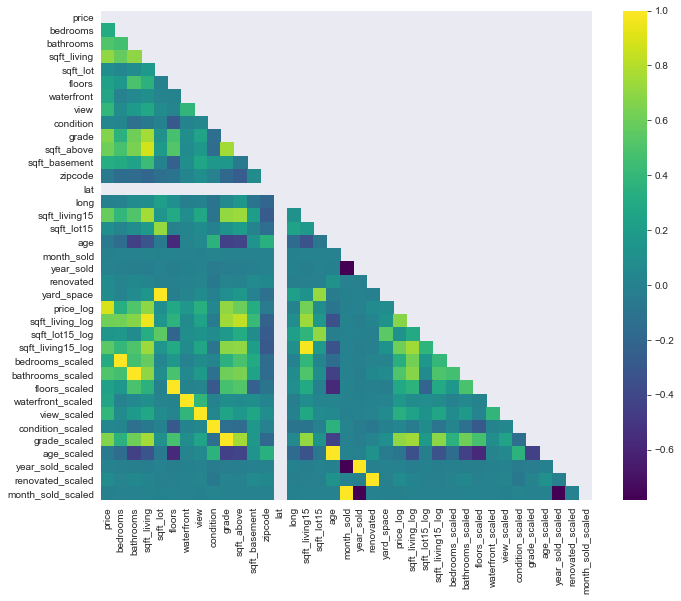

In [29]:
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(data_corr, mask=mask, ax=ax1, cmap="viridis");

# Further Data Exploration of Selected Independent Variable

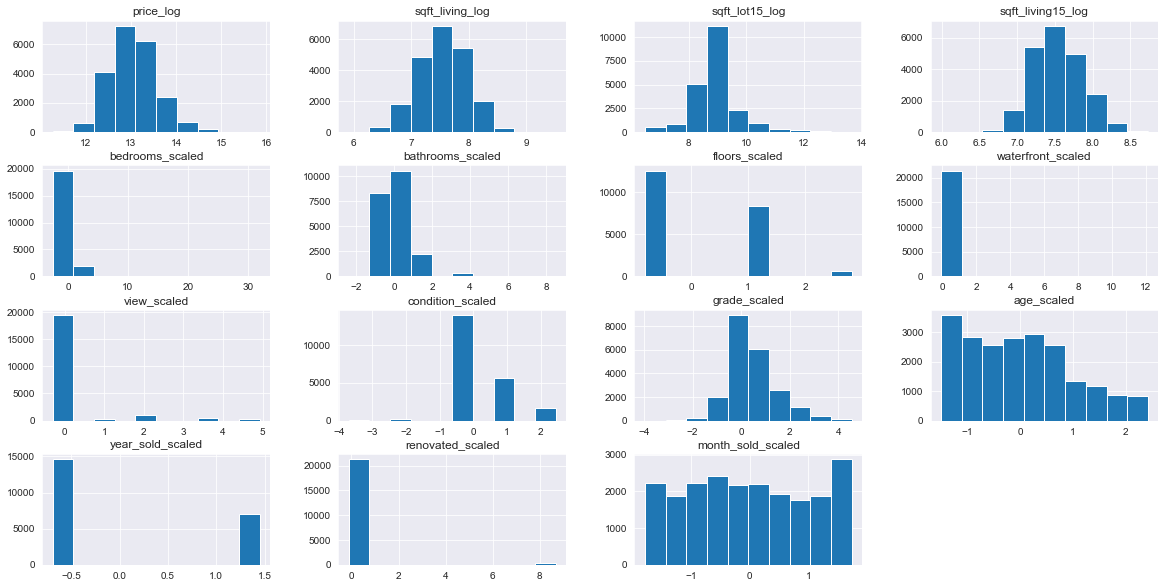

In [30]:
model1.hist(figsize  = [20, 10]); 

In [31]:
def bootstrap(df,column,target,sample_size=300):
    unique = df[column].unique()
    for val in unique:
        samples = []
        frame = df[df[column] == val]
        for i in range(sample_size):
            sample = np.random.choice(frame[target], size = frame.shape[0], replace = True)
            samples.append(sample.mean())
        plt.hist(samples, label = val, alpha =.7)
    plt.legend();

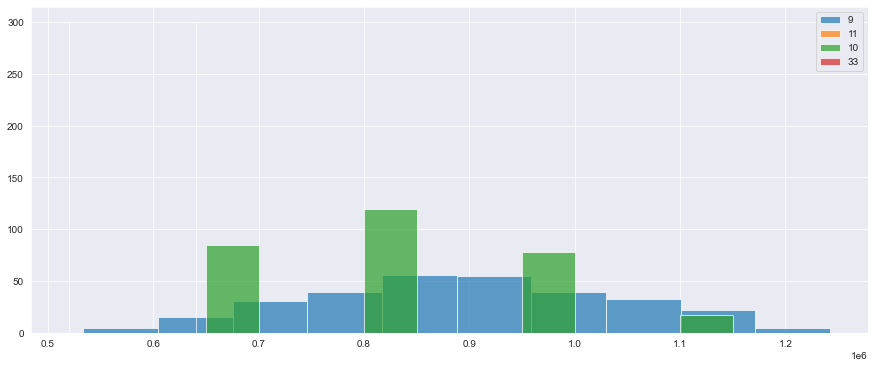

In [32]:
plt.figure(figsize = (15,6))
frame = data[data.bedrooms>8]
bootstrap(frame,'bedrooms','price')

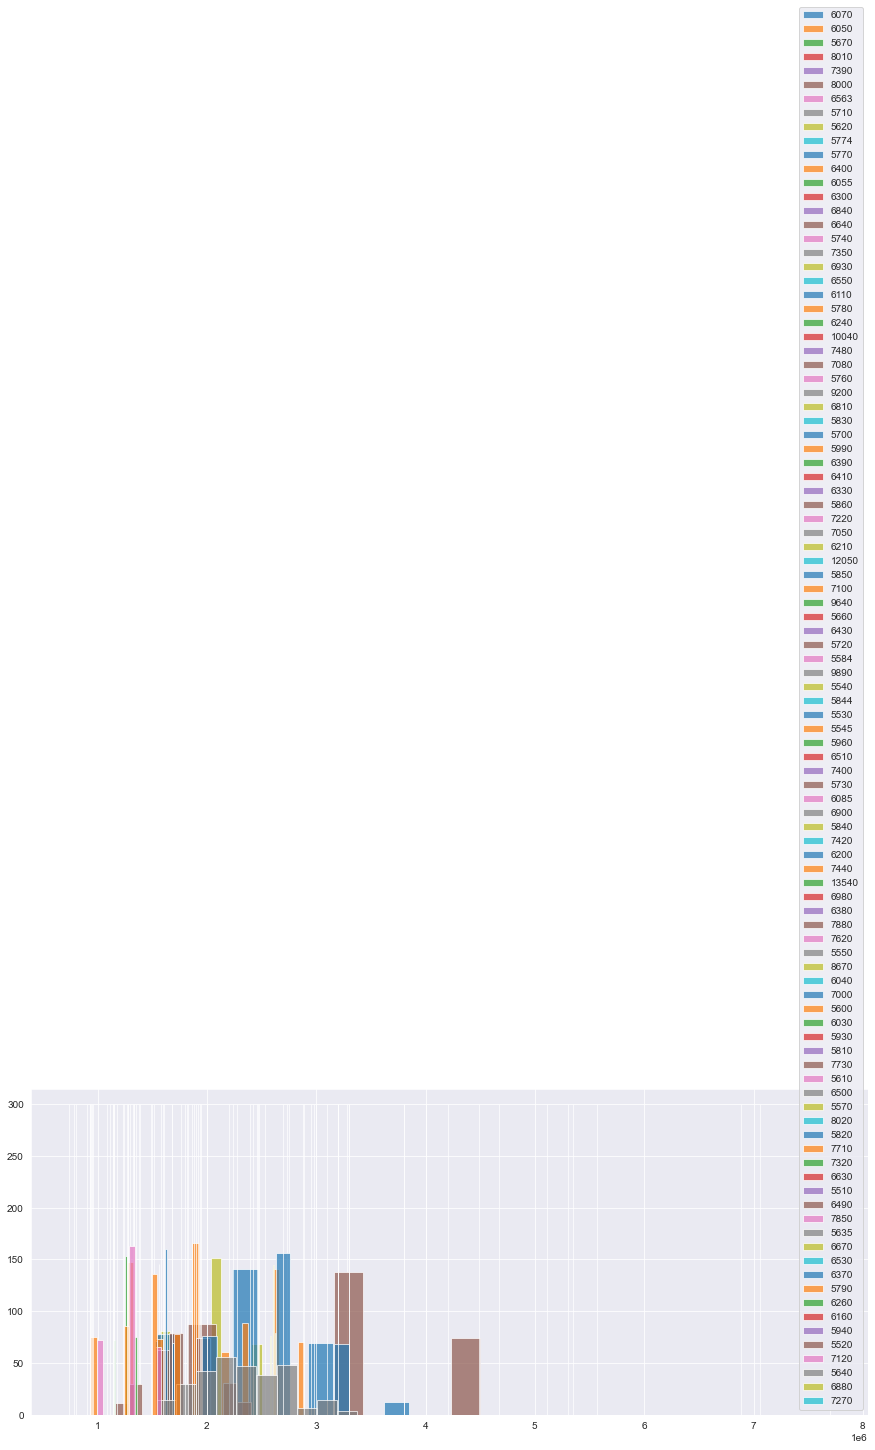

In [33]:
plt.figure(figsize = (15,6))
frame = data[data.sqft_living>5500]
bootstrap(frame,'sqft_living','price')

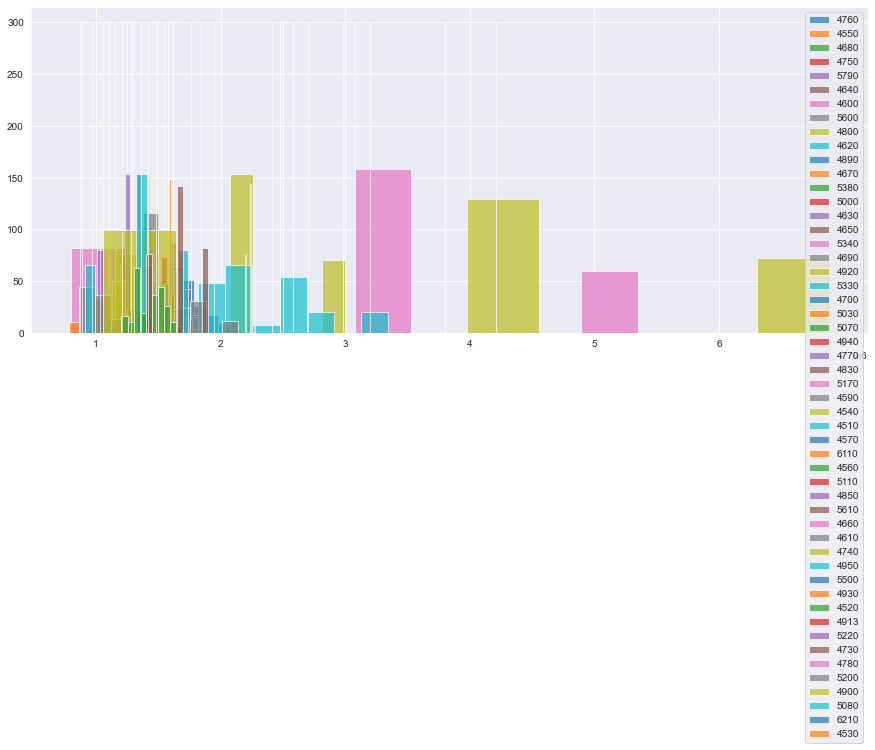

In [34]:
plt.figure(figsize = (15,6))
frame = data[data.sqft_living15>4500]
bootstrap(frame,'sqft_living15','price')

In [35]:
# Removing Outliers
model1 = model1[model1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

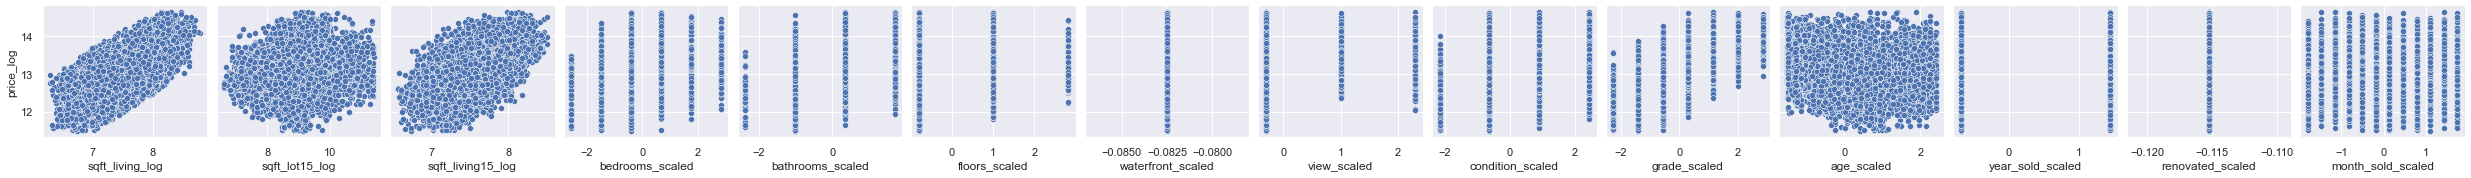

In [48]:
sns.pairplot(data = model1,
             y_vars=['price_log'],
             x_vars=  ['sqft_living_log',
                       'sqft_lot15_log',
                       'sqft_living15_log',
                       'bedrooms_scaled',
                       'bathrooms_scaled',
                       'floors_scaled',
                       'waterfront_scaled',
                       'view_scaled',
                       'condition_scaled',
                       'grade_scaled',
                       'age_scaled',
                       'year_sold_scaled',
                       'renovated_scaled',
                       'month_sold_scaled']);

# Final Linear Regression Model

In [ ]:
fsm_df1 = model1.copy()
fsm_df1.dropna(inplace=True)

In [ ]:
fsm1 = ols(formula ="price_log ~ sqft_living_log + sqft_lot15_log + sqft_living15_log + bedrooms_scaled + bathrooms_scaled + floors_scaled + waterfront_scaled + view_scaled + condition_scaled + grade_scaled + age_scaled + year_sold_scaled + renovated_scaled + month_sold_scaled", data = fsm_df1)
fsm_results1 = fsm1.fit()

In [ ]:
fsm_results1.summary()

#  Final, Evaluation:

We are explaining about roughly 59.7% of the variance in home price, with our 14 features so far and it's statistically significant.

According to our model:

 - For each additional 1% increase in footage of the home's, we expect a home price to increase by $ 0.3589.
 
 
 - For each additional 1% increase in square footage of interior housing living space for the nearest 15 neighbors, we expect a home's price to decrease by - $ 0.1001.
 
 
 - For each additional 1% increase in the square footage of the land lots of the nearest 15 neighbors, we expect a home's price to increase by $ 0.2826.
 
 
 - For each additional 1% increase in bedrooms, we expect a home's price to decrease by $ -0.0323.
 
 
 - For each additional 1% increase in bathrooms, we expect a home's price to increase by $ 0.0411.
 
 
 - For each additional 1% increase in floors, we expect a home's prices to increase by $ 0.0248.
 
 
 - For each additional 1% increase in homes that have a waterfront view, we expect a home's price to decrease by -$ 0.7354. 
 
 
 - For each additional 1% increase in views, we expect a home's price to increase by $ 0.0365. 
 
 
 - For each additional 1% increase in how good the condition of the overall home, we expect a home's price to increase by $ 0.0309. 
 
 
 - For each additional 1% increase in overall grade given to the housing unit (based on King County grading system), we expect a home's price to increase by $ 0.2473. 
 
 
 - For each additional 1% increase in age (2021 - The Year Built), we expect a home's price to increase by $ 0.1700. 
 
 
 - For each additional 1% increase in year sold, we expect a home's price to increase by $ 0.0195. 
 
 
 - For each additional 1% increase in renovation, we expect a home's price to decrease by -$1.0271.
 
 
 - For each additional 1% increase in month sold, we expect a home's price to increase by -$ 0.0006.
 (Month Sold has a large p-value, meaning the month sold on home prices is not statistically significant.)
 

### We will now check the assumptions of this linear regression!

## Linearity, Model 1 Assumption 

The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not.

Thus returning a p-value above .05 means that the current model does meet the linearity assumption.

In [ ]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

## Normality, Model 1 Assumption

Linear regression assumes that the residuals are normally distributed. 

The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. 

Thus returning a low p-value means that the current model violates the normality assumption.

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we would see the points forming a line that’s roughly straight. 

Since, the Q-Q Plot shows the points falling along a straight line, which provide strong evidence that these numbers truly did come from a normal distribution.

In [ ]:
# Jarque-Bera (JB): 39.361
# Prob(JB): 2.84e-09

In [ ]:
res = fsm_results1.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

## Homoscedasticity  for Model 1:

Linear regression assumes that the variance of the dependent variable is homogeneous across different values of the independent variables. 

We can visualize this by looking at the predicted life expectancy vs. the residuals.

The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. 

Thus returning a low p-value means that the current model violates the homoscedasticity assumption.


However, residual scatter plot is a figure that shows one axis for predicted scores and one axis for errors of prediction. The difference between the obtained Logged Home Prices and the Predicted Logged Home Prices and the variance of the residuals should be the same for all predicted scores (homoscedasticity).  By looking at the scatter plot, this appears to be true since the scatter plot takes the (approximate) shape of a rectangular and the scores appear to be concentrated in the center (about the 0 point). 

In [ ]:
y = fsm_df1["price_log"]
y_hat = fsm_results1.predict()

In [ ]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Home Price",
        ylabel="Residuals (Predicted - Actual Home Price)")
ax2.scatter(x = y_hat, y = y_hat-y, color = "blue", alpha=0.2);

In [ ]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df1[['sqft_living_log',
                          'sqft_lot15_log',
                          'sqft_living15_log',
                          'bedrooms_scaled',
                          'bathrooms_scaled',
                          'floors_scaled',
                          'waterfront_scaled',
                          'view_scaled',
                          'condition_scaled',
                          'grade_scaled',
                          'age_scaled',
                          'year_sold_scaled',
                          'renovated_scaled',
                          'month_sold_scaled']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

## Independence for Model 1:

You might have noticed in the regression output that there was a warning about the condition number being high. 

The condition number is a measure of stability of the matrix used for computing the regression and a number above 30 can indicate strong multicollinearity. 

Our Condition Number output was 1.72e+21

The VIF metrics are only high for sqft_living_log, which means that there is stronger multicollinearity. However, the majority of the logged and scaled variables have still not exceeded the threshold of 5.

In [ ]:
rows = fsm_df1[['sqft_living_log',
                          'sqft_lot15_log',
                          'sqft_living15_log',
                          'bedrooms_scaled',
                          'bathrooms_scaled',
                          'floors_scaled',
                          'waterfront_scaled',
                          'view_scaled',
                          'condition_scaled',
                          'grade_scaled',
                          'age_scaled',
                          'year_sold_scaled',
                          'renovated_scaled',
                          'month_sold_scaled']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(14)]
vif_df["feature"] = ['sqft_living_log',
                          'sqft_lot15_log',
                          'sqft_living15_log',
                          'bedrooms_scaled',
                          'bathrooms_scaled',
                          'floors_scaled',
                          'waterfront_scaled',
                          'view_scaled',
                          'condition_scaled',
                          'grade_scaled',
                          'age_scaled',
                          'year_sold_scaled',
                          'renovated_scaled',
                          'month_sold_scaled']

vif_df

# Summary

**This model had 14 input features: Sqft_living_log, Sqft_lot15_log, Sqft_living15_log, Bedrooms_scaled, Bathrooms_scaled , Floors_scaled, Waterfront_scaled, View_scaled, Condition_scaled, Grade_scaled, Age_scaled, Year_sold_scaled, Renovated_scaled and Month_sold_scaled.**


**It had an r-squared of 0.597. This model did not violate the linearity assumption (p = 0.8494), but it did violate the normality (p < 0.001) and homoscedasticity (p < 0.001) assumptions. Based on the variance inflaction factor metric, it did not violate the independence assumption.**

**However, the Q-Q Plot shows the points falling along a straight line, which provide strong evidence that these numbers truly did come from a normal distribution. Finally, the residual scatter plot appears to meet homoscedasticity assumption since the scores appear to be concentrated in the center (about the 0 point) and distributed in a rough rectangularly pattern.**



We are able to address the following questions from above:

*1. Do various predicting factors which have been chosen initially really affect the home prices?* 

    - With 14 features we are able to explain about 60% of the variance in home prices in
      house sales, from a northwestern county. This indicates that these factors truly are
      explanatory. More analysis is required to understand how much additional explanatory
      power would be provided by incorporating features with less multicollinearity.
    



*2. Which top factors might increase the estimated value of a home, for the buyer or the seller, and by what amount?*

The three factors that would increase value of a home:

    1. Square Foot Living
        - The footage of the home
        - For each additional 1% increase in footage of the homes, we expect a home price 
          to increase by $ 0.3589.
        
    2. Square Foot Living 15
        - The square footage of interior housing living space for the nearest 15 neighbors
        - For each additional 1% increase in the square footage of the land lots of the
          nearest 15 neighbors, we expect a homes price to increase by $ 0.2826.
        
    3. Grade
        - The overall grade given to the housing unit, based on the King County grading 
          system
        - For each additional 1% increase in overall grade given to the housing unit
         (based on King County grading system), we expect a homes price to increase 
          by $ 0.2473




*3. Which top factors might decrease the estimated value of a home, for the buyer or the seller, and by what amount?*

The top three factors that would decrease value of a home:
	
    1. Renovated:
        - If the home was renovated within the last 10 years, it received a 1. If not, it
          received a 0.
        - For each additional 1% increase in renovated, we expect a homes price to
          decrease by $-1.0271.

    2. Waterfront: 
        - The houses which have a view to a waterfront, 1 if so and 0 if not. 
        - For each additional 1% increase in homes that have view a waterfront, we expect
          a homes price to decrease by $-0.7354.
        
    3. Square Foot Living 15
        - The square footage of interior housing living space for the nearest 15 neighbors
        - For each additional 1% increase in square footage of interior housing living 
          space for the nearest 15 neighbors, we expect a homes price to decrease 
          by $-0.1001.